In [5]:
import sys
sys.path.append("/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/")

In [6]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [7]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('data/heart_v2.csv')

In [8]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [10]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
!pip install six

You should consider upgrading via the '/media/data/anaconda3/envs/upgrad/bin/python -m pip install --upgrade pip' command.


In [16]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

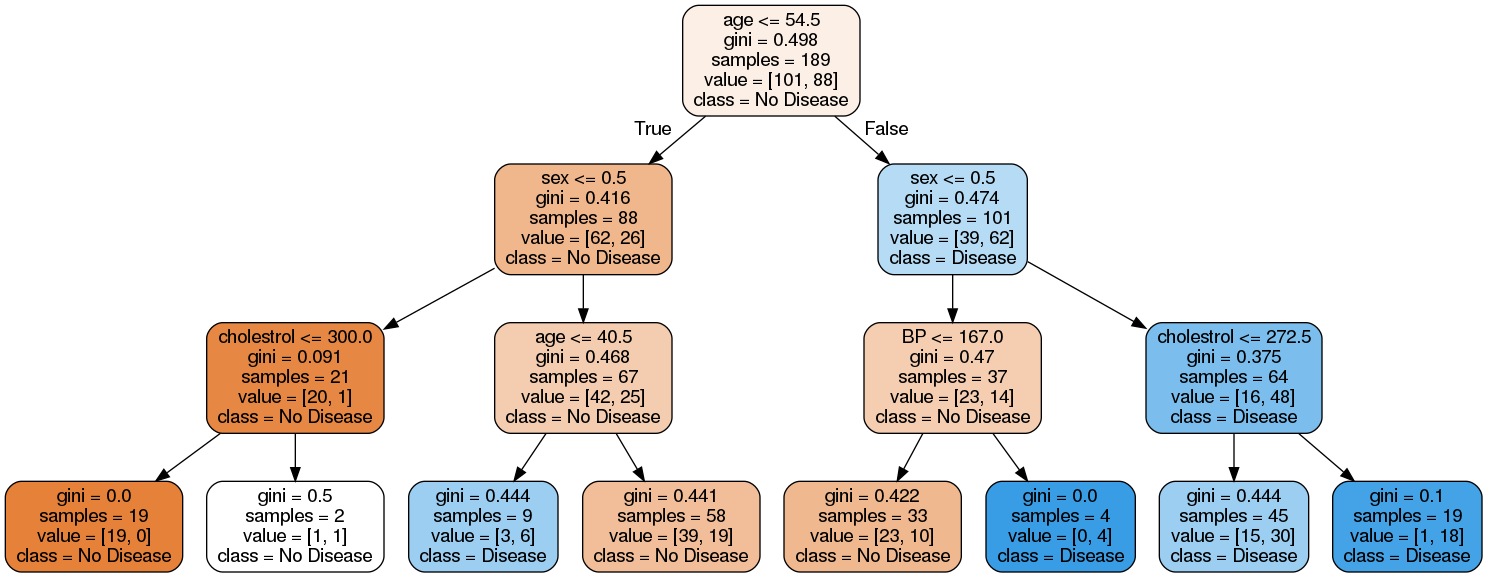

In [17]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [21]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

Creating helper functions to evaluate model performance and help plot the decision tree

In [22]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [24]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

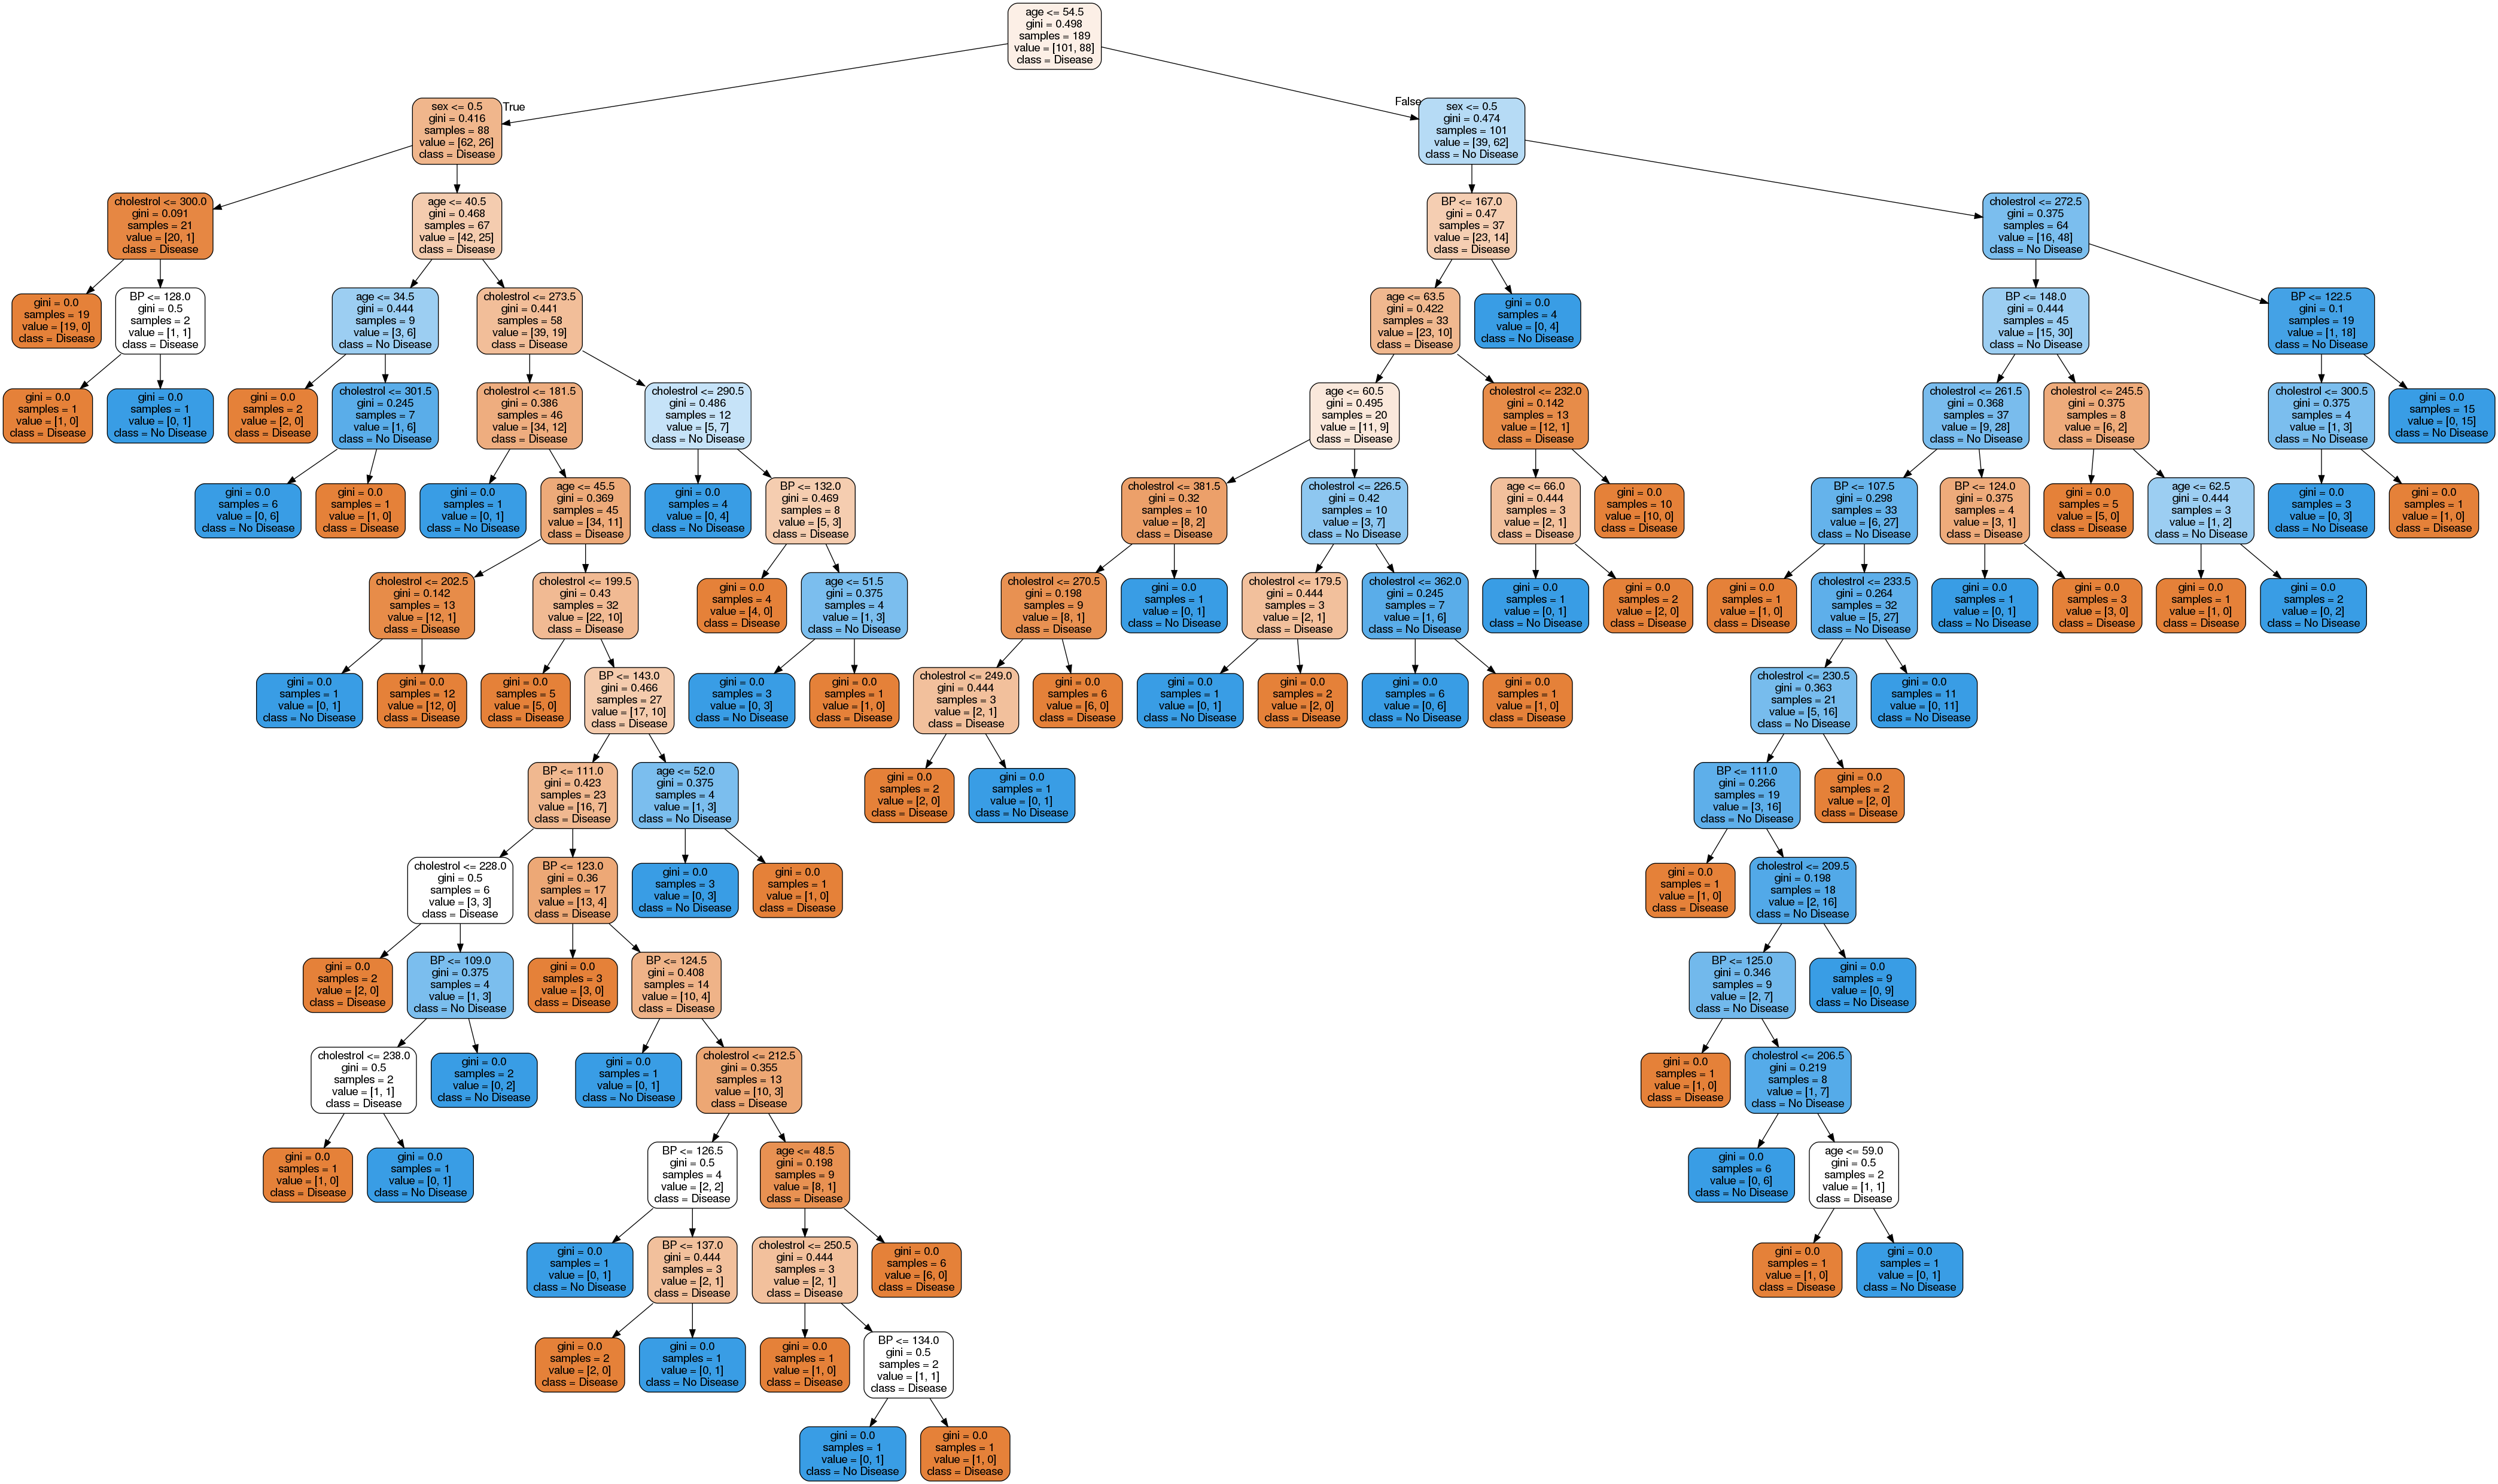

In [25]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [26]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [27]:
?DecisionTreeClassifier

In [28]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

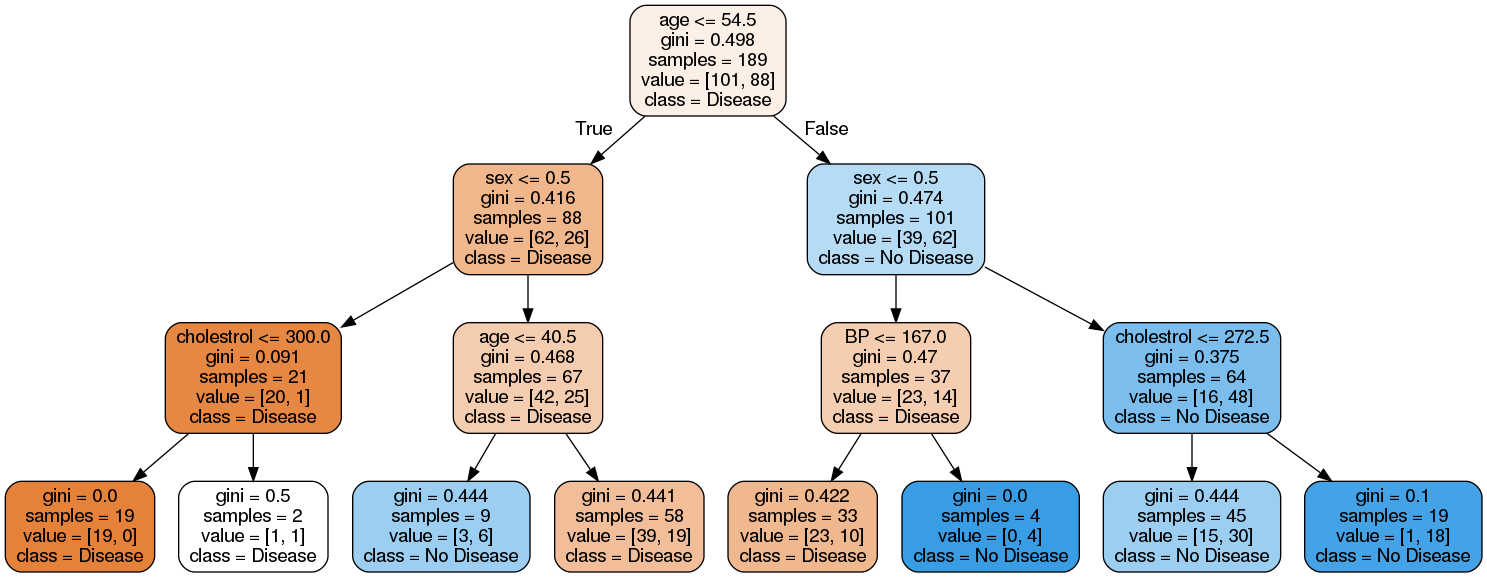

In [29]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [30]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [31]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

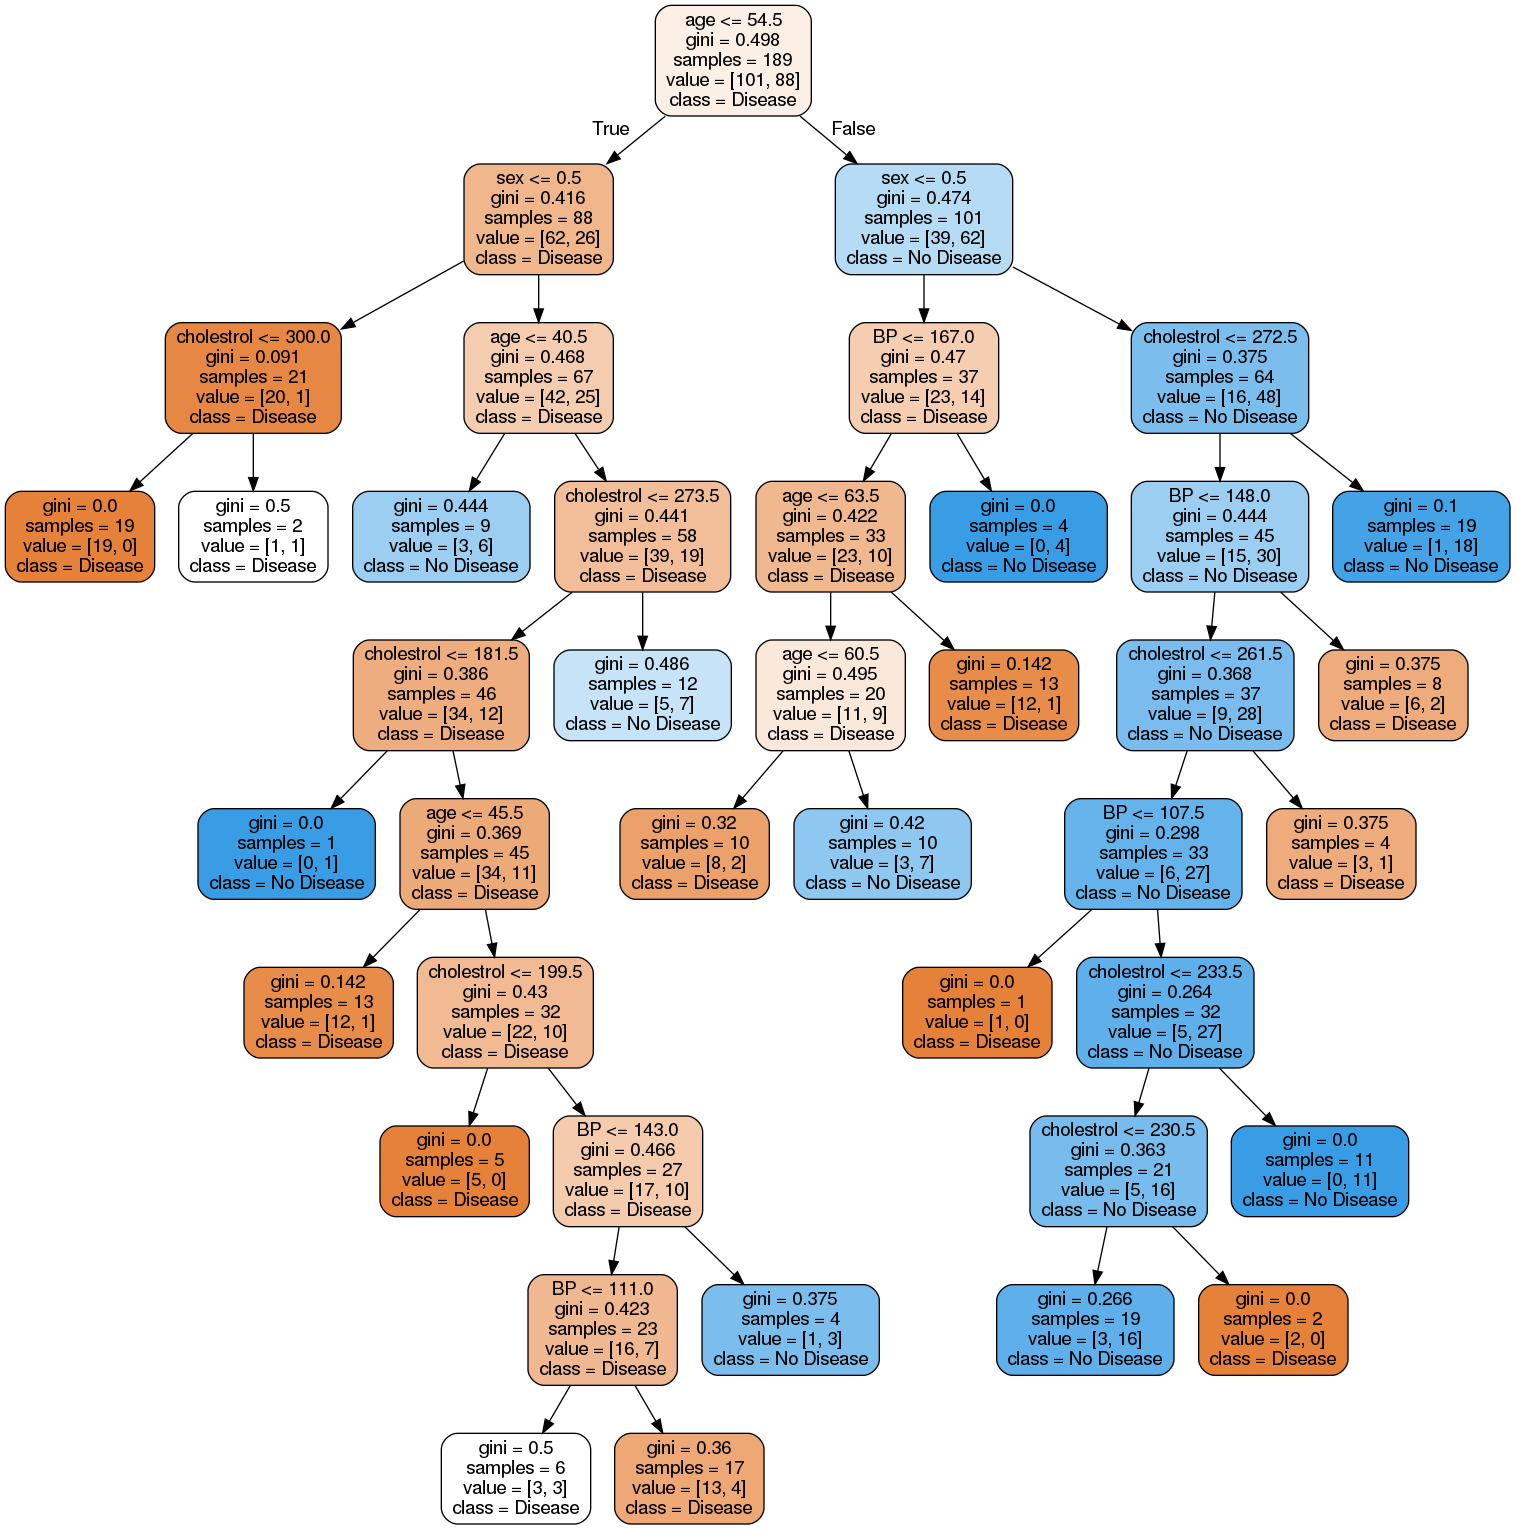

In [32]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [33]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [34]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

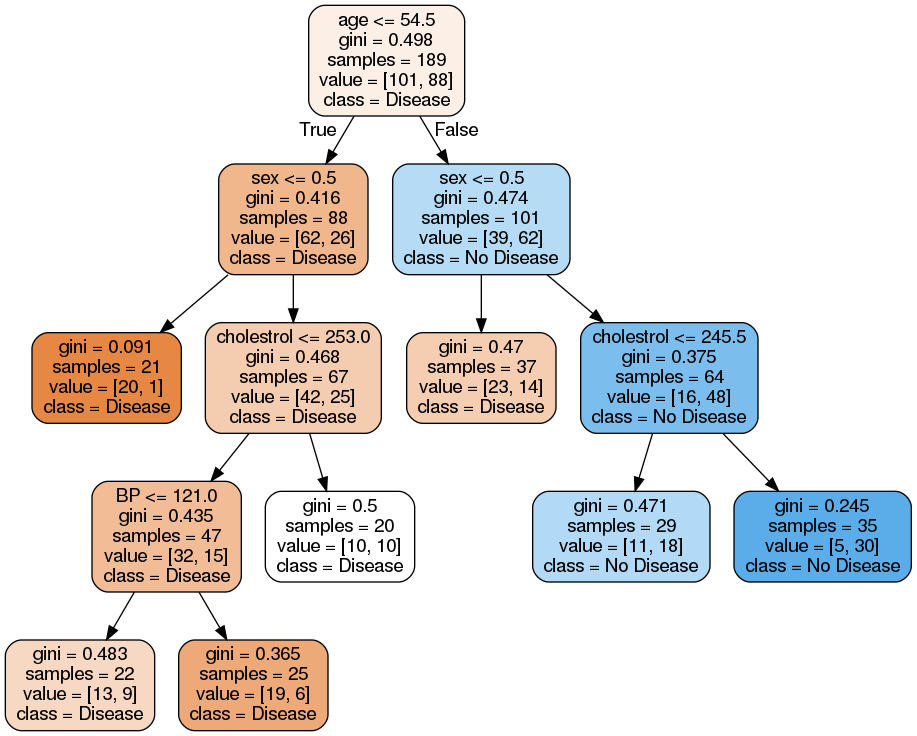

In [35]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [36]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [37]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

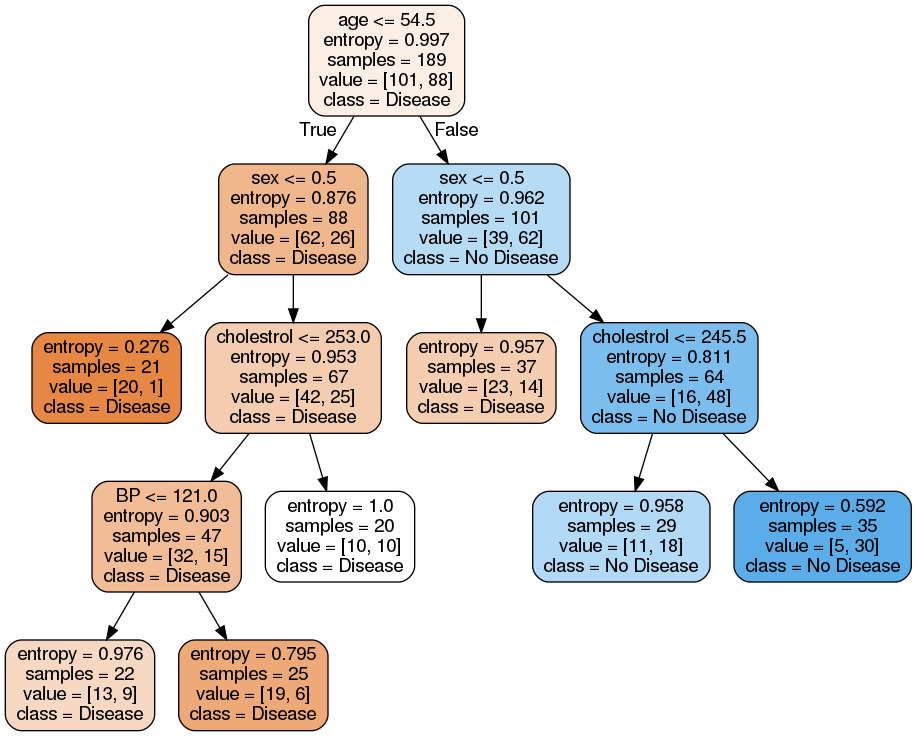

In [38]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [39]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [40]:
dt = DecisionTreeClassifier(random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [43]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [44]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [45]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished
/media/data/anaconda3/envs/ml_pneumonia_3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 299 ms, sys: 70 ms, total: 369 ms
Wall time: 3.54 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                        

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006089,0.000138,0.003019,0.000466,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650794,0.082649,13
1,0.006428,0.001097,0.002863,0.000400,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650794,0.082649,13
2,0.005153,0.000301,0.002521,0.000241,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645503,0.079399,19
3,0.004038,0.000767,0.003213,0.002244,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656085,0.048628,2
4,0.003751,0.000433,0.001671,0.000404,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534392,0.004245,41


In [47]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.003141,0.000097,0.001433,0.000039,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666667,0.064083,1
3,0.004038,0.000767,0.003213,0.002244,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656085,0.048628,2
5,0.003644,0.000629,0.001728,0.000298,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656085,0.055730,2
8,0.002345,0.000249,0.001051,0.000250,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656085,0.048628,2
13,0.002801,0.000390,0.000954,0.000200,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656085,0.048628,2


In [48]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [49]:
dt_best = grid_search.best_estimator_

In [50]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



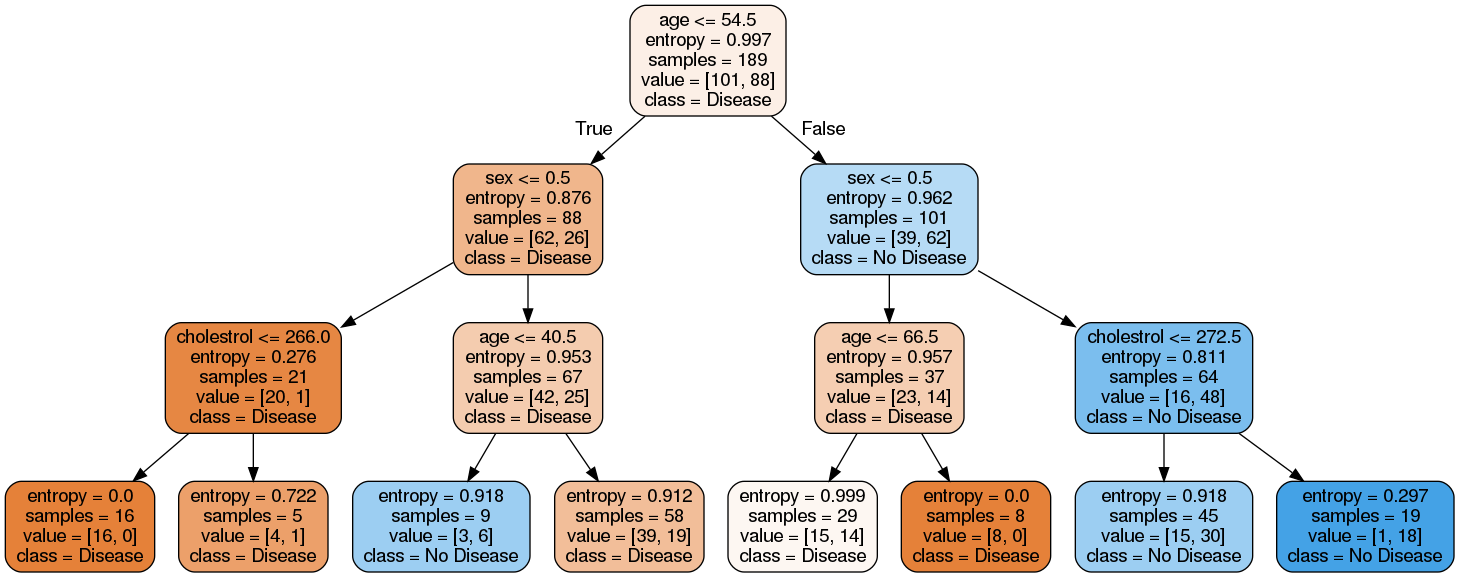

In [53]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())